In [ ]:
# Automated Hyperparameter Optimization Analysis
## Optuna + XGBoost + MLflow (California Housing)

This notebook analyzes the results of an automated hyperparameter optimization
pipeline built using Optuna and MLflow.

### Objectives
- Analyze optimization behavior across trials
- Identify most influential hyperparameters
- Compare baseline vs tuned model performance
- Interpret final model performance on test data


import optuna
print(optuna.__version__)

In [3]:
import sys
print(sys.executable)

C:\Users\mdsha\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
import optuna
print(optuna.__version__)

4.6.0


In [4]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [5]:
# Load Optuna study from SQLite database
study = optuna.load_study(
    study_name="xgboost-housing-optimization",
    storage="sqlite:///../outputs/optuna_study.db"
)

print("Number of trials:", len(study.trials))
print("Best CV RMSE:", np.sqrt(-study.best_value))
print("Best hyperparameters:")
study.best_params

Number of trials: 200
Best CV RMSE: 0.45029771877661834
Best hyperparameters:


{'n_estimators': 300,
 'max_depth': 10,
 'learning_rate': 0.06571113791345756,
 'subsample': 0.7180668008856311,
 'colsample_bytree': 0.7730083781865482,
 'min_child_weight': 7,
 'gamma': 0.09311345768473454}

C:\Users\mdsha\AppData\Local\Temp\ipykernel_26388\836899881.py:4: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<Figure size 800x500 with 0 Axes>

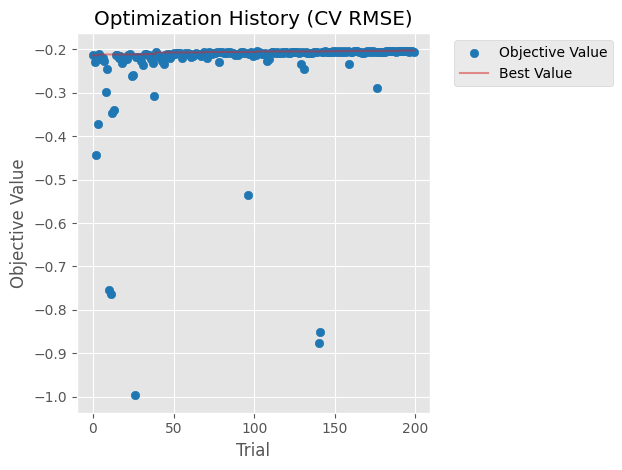

In [6]:
from optuna.visualization.matplotlib import plot_optimization_history

plt.figure(figsize=(8, 5))
plot_optimization_history(study)
plt.title("Optimization History (CV RMSE)")
plt.tight_layout()
plt.show()